In [1]:
pip install causal-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

df_train = pd.read_csv('C:/Users/ACER/Documents/causal/csuite_mixed_confounding/train.csv')
df_test = pd.read_csv('C:/Users/ACER/Documents/causal/csuite_mixed_confounding/test.csv')

In [2]:
import numpy as np
from causallearn.search.Granger.Granger import Granger
from sklearn.model_selection import train_test_split

data_array_train = df_train.values
data_array_test = df_test.values

G = Granger()
coeff_train = G.granger_lasso(data_array_train)
coeff_test = G.granger_lasso(data_array_test)

In [3]:
true_graph = coeff_train
estimated_graph = coeff_test

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute SHD
def compute_shd(true_graph, estimated_graph):
    if true_graph.shape != estimated_graph.shape:
        raise ValueError("The shapes of true_graph and estimated_graph must be the same.")
        
    added_edges = np.sum((estimated_graph - true_graph) == 1)
    removed_edges = np.sum((estimated_graph - true_graph) == -1)
    return added_edges + removed_edges

# Function to compute SID
def compute_sid(true_graph, estimated_graph):
    if true_graph.shape != estimated_graph.shape:
        raise ValueError("The shapes of true_graph and estimated_graph must be the same.")
        
    true_edges = (true_graph != 0).astype(int)
    estimated_edges = (estimated_graph != 0).astype(int)
    return np.sum(np.abs(true_edges - estimated_edges))

# Function to compute FDR
def compute_fdr(true_graph, estimated_graph):
    if true_graph.shape != estimated_graph.shape:
        raise ValueError("The shapes of true_graph and estimated_graph must be the same.")
        
    tp = np.sum((true_graph == 1) & (estimated_graph == 1))  # True Positives
    fp = np.sum((true_graph == 0) & (estimated_graph == 1))  # False Positives
    return fp / (tp + fp) if (tp + fp) > 0 else 0

# Function to compute MCC
def compute_mcc(true_graph, estimated_graph):
    if true_graph.shape != estimated_graph.shape:
        raise ValueError("The shapes of true_graph and estimated_graph must be the same.")
        
    # Flatten the matrices for binary classification
    y_true = (true_graph != 0).flatten()
    y_pred = (estimated_graph != 0).flatten()
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0
    return mcc


shd = compute_shd(true_graph, estimated_graph)
sid = compute_sid(true_graph, estimated_graph)
fdr = compute_fdr(true_graph, estimated_graph)
mcc = compute_mcc(true_graph, estimated_graph)

print("SHD:", shd)
print("SID:", sid)
print("FDR:", fdr)
print("MCC:", mcc)


SHD: 0
SID: 31
FDR: 0
MCC: -0.049797433333223305


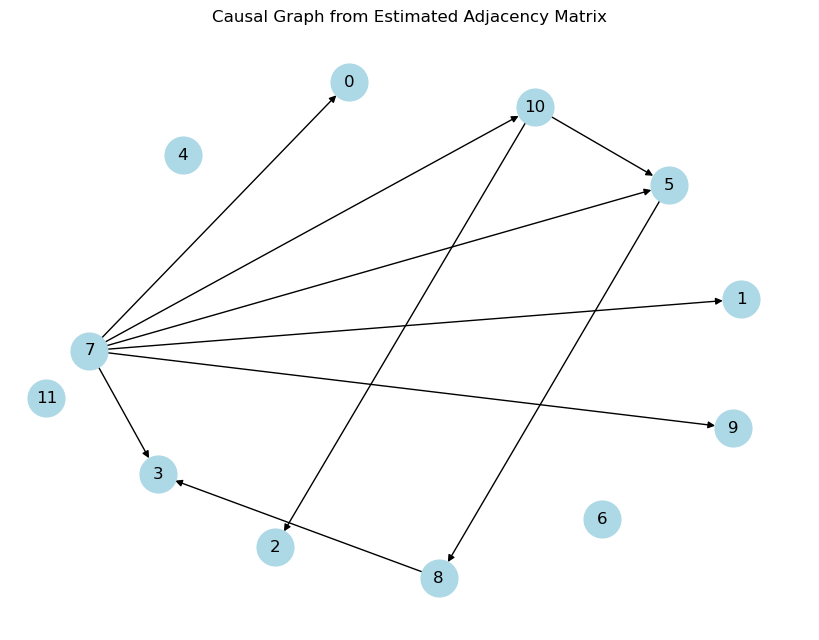

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

estimated_adj_square = estimated_graph[:, :12]
G = nx.from_numpy_array(estimated_adj_square, create_using=nx.DiGraph)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Position nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrows=True)
plt.title("Causal Graph from Estimated Adjacency Matrix")
plt.show()
